## 미니 프로젝트 : 영국 시장의 중고 자동차 가격 데이터 다루기

### 데이터 불러오기, 살펴보기

In [359]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [360]:
df_car = pd.read_csv('./data/cars.csv')
df_brand = pd.read_csv('./data/brand.csv')

In [361]:
df_car.head()

,title,Price,Mileage(miles),Registration_Year,Previous Owners,Fuel type,Body type,Engine,Gearbox,Doors,Seats,Emission Class,Service history
0,SKODA FABIA,6900,70189,2016,3.0,Diesel,Hatchback,1.4L,Manual,5.0,5.0,Euro 6,NaN
1,VAUXHALL CORSA,1495,88585,2008,4.0,Petrol,Hatchback,1.2L,Manual,3.0,5.0,Euro 4,Full
2,HYUNDAI I30,949,137000,2011,NaN,Petrol,Hatchback,1.4L,Manual,5.0,5.0,Euro 5,NaN
3,MINI HATCH,2395,96731,2010,5.0,Petrol,Hatchback,1.4L,Manual,3.0,4.0,Euro 4,Full
4,VAUXHALL CORSA,1000,85000,2013,NaN,Diesel,Hatchback,1.3L,Manual,5.0,5.0,Euro 5,NaN


In [362]:
df_brand.head()

,title,country
0,skoda,Czech Republic
1,vauxhall,United Kingdom
2,hyundai,South Korea
3,mini,United Kingdom
4,ford,United States


### 자동차 데이터와 브랜드 데이터 합치기

- df_car와 df_brand를 합치기 위해, df_car에 brand 컬럼 추가
    - title 컬럼의 단어를 추출하여 brand 컬럼에 추가

In [363]:
df_car['brand'] = df_car['title'].str.split().str[0]
df_car.head()

,title,Price,Mileage(miles),Registration_Year,Previous Owners,Fuel type,Body type,Engine,Gearbox,Doors,Seats,Emission Class,Service history,brand
0,SKODA FABIA,6900,70189,2016,3.0,Diesel,Hatchback,1.4L,Manual,5.0,5.0,Euro 6,NaN,SKODA
1,VAUXHALL CORSA,1495,88585,2008,4.0,Petrol,Hatchback,1.2L,Manual,3.0,5.0,Euro 4,Full,VAUXHALL
2,HYUNDAI I30,949,137000,2011,NaN,Petrol,Hatchback,1.4L,Manual,5.0,5.0,Euro 5,NaN,HYUNDAI
3,MINI HATCH,2395,96731,2010,5.0,Petrol,Hatchback,1.4L,Manual,3.0,4.0,Euro 4,Full,MINI
4,VAUXHALL CORSA,1000,85000,2013,NaN,Diesel,Hatchback,1.3L,Manual,5.0,5.0,Euro 5,NaN,VAUXHALL


- df_brand의 title 컬럼에 저장된 값을 대문자로 변환

In [364]:
df_brand['title'] = df_brand['title'].str.upper()
df_brand.head()

,title,country
0,SKODA,Czech Republic
1,VAUXHALL,United Kingdom
2,HYUNDAI,South Korea
3,MINI,United Kingdom
4,FORD,United States


- df_car의 brand 컬럼과 df_brand의 title 컬럼을 기준으로 데이터 합치기

In [365]:
df_merge = pd.merge(df_car, df_brand, how='left', left_on='brand', right_on='title')
df_merge.head()

,title_x,Price,Mileage(miles),Registration_Year,Previous Owners,Fuel type,Body type,Engine,Gearbox,Doors,Seats,Emission Class,Service history,brand,title_y,country
0,SKODA FABIA,6900,70189,2016,3.0,Diesel,Hatchback,1.4L,Manual,5.0,5.0,Euro 6,NaN,SKODA,SKODA,Czech Republic
1,VAUXHALL CORSA,1495,88585,2008,4.0,Petrol,Hatchback,1.2L,Manual,3.0,5.0,Euro 4,Full,VAUXHALL,VAUXHALL,United Kingdom
2,HYUNDAI I30,949,137000,2011,NaN,Petrol,Hatchback,1.4L,Manual,5.0,5.0,Euro 5,NaN,HYUNDAI,HYUNDAI,South Korea
3,MINI HATCH,2395,96731,2010,5.0,Petrol,Hatchback,1.4L,Manual,3.0,4.0,Euro 4,Full,MINI,MINI,United Kingdom
4,VAUXHALL CORSA,1000,85000,2013,NaN,Diesel,Hatchback,1.3L,Manual,5.0,5.0,Euro 5,NaN,VAUXHALL,VAUXHALL,United Kingdom


- df_merge에서 중복되는 컬럼 title_y를 제거

In [366]:
df_merge = df_merge.drop('title_y', axis=1)

- df_merge에서 title_x 컬럼의 이름을 title로 변경

In [367]:
df_merge = df_merge.rename({'title_x':'title'}, axis=1)

- df_merge의 복사본 생성

In [368]:
df_bonus = df_merge.copy()

### 카테고리형 변수를 숫자 형태로 변환하기

- df_merge의 컬럼들의 자료형 확인

In [369]:
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3687 entries, 0 to 3686
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   title              3687 non-null   object 
 1   Price              3687 non-null   int64  
 2   Mileage(miles)     3687 non-null   int64  
 3   Registration_Year  3687 non-null   int64  
 4   Previous Owners    2276 non-null   float64
 5   Fuel type          3687 non-null   object 
 6   Body type          3687 non-null   object 
 7   Engine             3642 non-null   object 
 8   Gearbox            3687 non-null   object 
 9   Doors              3662 non-null   float64
 10  Seats              3652 non-null   float64
 11  Emission Class     3600 non-null   object 
 12  Service history    540 non-null    object 
 13  brand              3687 non-null   object 
 14  country            3687 non-null   object 
dtypes: float64(3), int64(3), object(9)
memory usage: 432.2+ KB


- Engine 컬럼의 데이터에서 L 문자를 제거하여 숫자 부분만 저장

In [370]:
df_merge['Engine'].unique()

array(['1.4L', '1.2L', '1.3L', '2.0L', '1.6L', '2.3L', '1.8L', '1.0L',
       '3.0L', '1.5L', '1.9L', '2.4L', '2.2L', '3.5L', '3.2L', '2.5L',
       '1.1L', '3.1L', '3.7L', '2.6L', '2.1L', '2.8L', '5.0L', '0.8L',
       '2.7L', '1.7L', '0.9L', '4.2L', nan, '4.4L', '4.3L', '3.3L',
       '5.5L', '4.8L', '6.3L'], dtype=object)

In [371]:
# df_merge['Engine'] = df_merge['Engine'].str.removesuffix('L')
df_merge['Engine'] = df_merge['Engine'].str[:3]

In [372]:
df_merge['Engine'].unique()

array(['1.4', '1.2', '1.3', '2.0', '1.6', '2.3', '1.8', '1.0', '3.0',
       '1.5', '1.9', '2.4', '2.2', '3.5', '3.2', '2.5', '1.1', '3.1',
       '3.7', '2.6', '2.1', '2.8', '5.0', '0.8', '2.7', '1.7', '0.9',
       '4.2', nan, '4.4', '4.3', '3.3', '5.5', '4.8', '6.3'], dtype=object)

- Emission Class 컬럼에서 숫자 부분만 추출하여 저장

In [373]:
df_merge['Emission Class'] = df_merge['Emission Class'].str[-1]

In [374]:
df_merge['Emission Class'].unique()

array(['6', '4', '5', nan, '3', '2', '1'], dtype=object)

- to_numeric 메소드를 사용하여 Engine, Emission Class 컬럼의 자료형을 숫자 형태로 변환

In [375]:
df_merge['Engine'] = pd.to_numeric(df_merge['Engine'])
df_merge['Emission Class'] = pd.to_numeric(df_merge['Emission Class'])
df_merge['Emission Class'] = df_merge['Emission Class'].astype('Int64')

In [376]:
df_merge['Emission Class']

0       6
1       4
2       5
3       4
4       5
       ..
3682    4
3683    5
3684    5
3685    4
3686    5
Name: Emission Class, Length: 3687, dtype: Int64

- df_merge의 컬럼별로 결측치 비율 확인

In [377]:
df_merge.isna().sum()

title                   0
Price                   0
Mileage(miles)          0
Registration_Year       0
Previous Owners      1411
Fuel type               0
Body type               0
Engine                 45
Gearbox                 0
Doors                  25
Seats                  35
Emission Class         87
Service history      3147
brand                   0
country                 0
dtype: int64

In [378]:
df_merge.count()

title                3687
Price                3687
Mileage(miles)       3687
Registration_Year    3687
Previous Owners      2276
Fuel type            3687
Body type            3687
Engine               3642
Gearbox              3687
Doors                3662
Seats                3652
Emission Class       3600
Service history       540
brand                3687
country              3687
dtype: int64

In [379]:
(df_merge.count() + df_merge.isna().sum())

title                3687
Price                3687
Mileage(miles)       3687
Registration_Year    3687
Previous Owners      3687
Fuel type            3687
Body type            3687
Engine               3687
Gearbox              3687
Doors                3687
Seats                3687
Emission Class       3687
Service history      3687
brand                3687
country              3687
dtype: int64

In [380]:
df_merge.isna().sum() / (df_merge.count() + df_merge.isna().sum())
## df_merge.isna().mean()과 동일

title                0.000000
Price                0.000000
Mileage(miles)       0.000000
Registration_Year    0.000000
Previous Owners      0.382696
Fuel type            0.000000
Body type            0.000000
Engine               0.012205
Gearbox              0.000000
Doors                0.006781
Seats                0.009493
Emission Class       0.023596
Service history      0.853539
brand                0.000000
country              0.000000
dtype: float64

- Service history 컬럼에 포함된 값들을 중복 없이 출력

In [381]:
df_merge['Service history'].unique()

array([nan, 'Full'], dtype=object)

- Service history 값에 따라 그룹으로 묶어 Price의 평균 계산

In [382]:
df_merge.groupby(by='Service history', as_index=False)['Price'].mean()

,Service history,Price
0,Full,7290.209259


- Service history 컬럼의 결측치를 'Unknown' 문자열로 채우기

In [383]:
df_merge['Service history'] = df_merge['Service history'].fillna("Unknown")

In [384]:
df_merge.groupby('Service history')['Price'].mean()

Service history
Full       7290.209259
Unknown    5529.414045
Name: Price, dtype: float64

- Engine 컬럼의 결측치 확인

In [385]:
df_merge['Engine'].unique()

array([1.4, 1.2, 1.3, 2. , 1.6, 2.3, 1.8, 1. , 3. , 1.5, 1.9, 2.4, 2.2,
       3.5, 3.2, 2.5, 1.1, 3.1, 3.7, 2.6, 2.1, 2.8, 5. , 0.8, 2.7, 1.7,
       0.9, 4.2, nan, 4.4, 4.3, 3.3, 5.5, 4.8, 6.3])

In [386]:
df_merge['Engine'].isna().sum()

np.int64(45)

In [387]:
df_merge['Engine'].isna()

0       False
1       False
2       False
3       False
4       False
        ...  
3682    False
3683    False
3684    False
3685    False
3686    False
Name: Engine, Length: 3687, dtype: bool

- 결측치가 포함된 컬럼의 개수를 데이터마다 계산하여 na_values 컬럼에 저장

In [388]:
df_merge.head(10)

,title,Price,Mileage(miles),Registration_Year,Previous Owners,Fuel type,Body type,Engine,Gearbox,Doors,Seats,Emission Class,Service history,brand,country
0,SKODA FABIA,6900,70189,2016,3.0,Diesel,Hatchback,1.4,Manual,5.0,5.0,6,Unknown,SKODA,Czech Republic
1,VAUXHALL CORSA,1495,88585,2008,4.0,Petrol,Hatchback,1.2,Manual,3.0,5.0,4,Full,VAUXHALL,United Kingdom
2,HYUNDAI I30,949,137000,2011,NaN,Petrol,Hatchback,1.4,Manual,5.0,5.0,5,Unknown,HYUNDAI,South Korea
3,MINI HATCH,2395,96731,2010,5.0,Petrol,Hatchback,1.4,Manual,3.0,4.0,4,Full,MINI,United Kingdom
4,VAUXHALL CORSA,1000,85000,2013,NaN,Diesel,Hatchback,1.3,Manual,5.0,5.0,5,Unknown,VAUXHALL,United Kingdom
5,HYUNDAI COUPE,800,124196,2007,3.0,Petrol,Coupe,2.0,Manual,3.0,4.0,4,Unknown,HYUNDAI,South Korea
6,FORD FOCUS,798,140599,2008,NaN,Petrol,Hatchback,1.6,Manual,5.0,5.0,4,Unknown,FORD,United States
7,VAUXHALL CORSA,1995,90000,2009,NaN,Petrol,Hatchback,1.2,Manual,3.0,5.0,4,Unknown,VAUXHALL,United Kingdom
8,VOLVO 740,750,225318,2025,NaN,Petrol,Estate,2.3,Automatic,5.0,NaN,<NA>,Unknown,VOLVO,Sweden
9,PEUGEOT 207,1299,87000,2008,5.0,Diesel,Hatchback,1.6,Manual,5.0,5.0,4,Unknown,PEUGEOT,France


In [389]:
df_merge['na_values'] = df_merge.isna().sum(axis=1)

- na_values 컬럼의 값이 4 이상인 데이터 제거

In [390]:
df_merge = df_merge[ df_merge['na_values'] < 4 ]
df_merge = df_merge.reset_index(drop=True)

- na_values 컬럼 제거

In [391]:
df_merge = df_merge.drop('na_values', axis=1)

- 다른 컬럼들의 결측치를 채우기 위해, 히스토그램 그리고 중앙값 계산

In [392]:
df_merge.isna().mean()

title                0.000000
Price                0.000000
Mileage(miles)       0.000000
Registration_Year    0.000000
Previous Owners      0.382961
Fuel type            0.000000
Body type            0.000000
Engine               0.009526
Gearbox              0.000000
Doors                0.003266
Seats                0.005988
Emission Class       0.020142
Service history      0.000000
brand                0.000000
country              0.000000
dtype: float64

- Previous Owners 컬럼의 히스토그램 그리기

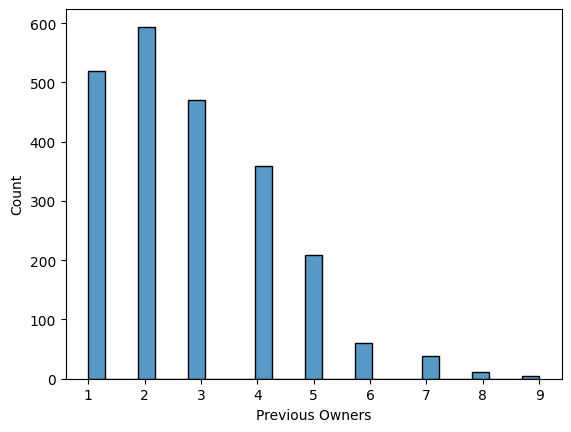

In [393]:
sns.histplot(df_merge['Previous Owners'])
plt.show()

## displot과의 차이는?
## distplot은 레거시 데이터가 됨

- Previous Owners 컬럼의 중앙값 계산

In [394]:
df_merge['Previous Owners'].median()

np.float64(3.0)

- 다른 컬럼들의 히스토그램 그리기

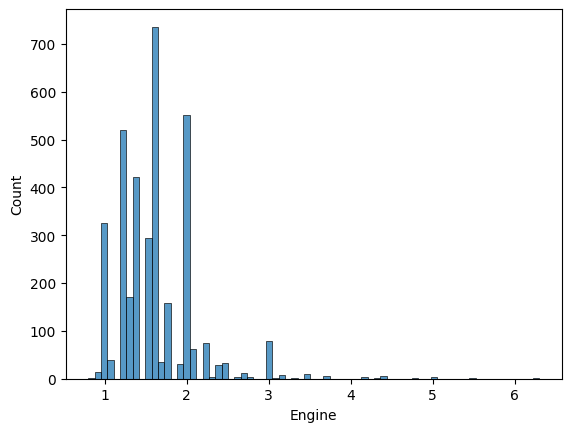

Engine 평균:  1.6061555372355043
Engine 중앙값:  1.6


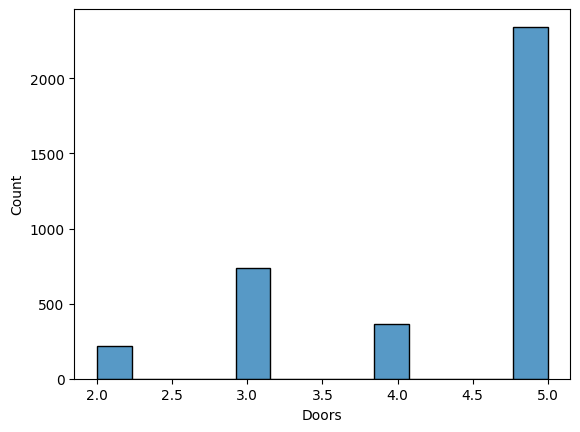

Doors 평균:  4.321409066084107
Doors 중앙값:  5.0


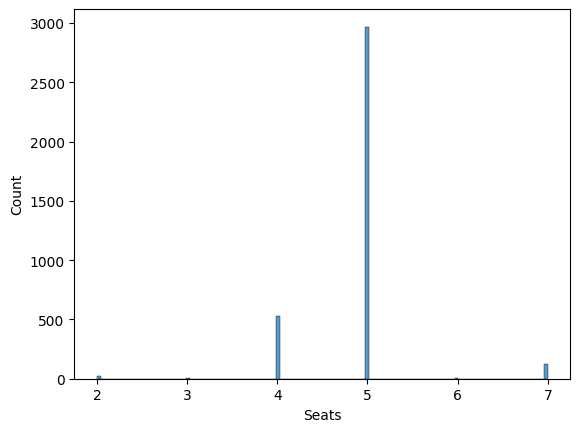

Seats 평균:  4.900328587075575
Seats 중앙값:  5.0


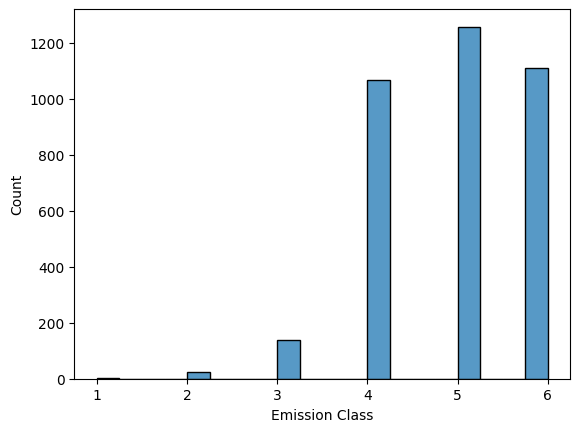

Emission Class 평균:  4.91
Emission Class 중앙값:  5.0


In [395]:
cols = ['Engine', 'Doors', 'Seats', 'Emission Class']

for col in cols :
    sns.histplot(df_merge[col])
    plt.show()
    
    print(f'{col} 평균: ', df_merge[col].mean())
    print(f'{col} 중앙값: ', df_merge[col].median())

- 각 컬럼들의 중앙값으로 결측치 채우기

In [396]:
df_merge['Previous Owners'].fillna( df_merge['Previous Owners'].median() )

0       3.0
1       4.0
2       3.0
3       5.0
4       3.0
       ... 
3669    4.0
3670    3.0
3671    3.0
3672    3.0
3673    7.0
Name: Previous Owners, Length: 3674, dtype: float64

In [397]:
cols = ['Previous Owners', 'Engine', 'Doors', 'Seats', 'Emission Class']

for col in cols :
    df_merge[col] = df_merge[col].fillna( df_merge[col].median() )

### 이상치 제거

In [398]:
df_merge.describe()

,Price,Mileage(miles),Registration_Year,Previous Owners,Engine,Doors,Seats,Emission Class
count,3674.000000,3.674000e+03,3674.000000,3674.000000,3674.000000,3674.000000,3674.000000,3674.0
mean,5788.852477,8.134587e+04,2011.847305,2.882145,1.606097,4.323625,4.900925,4.911813
std,4486.599984,3.943769e+04,5.083173,1.219004,0.484326,0.985908,0.575367,0.901556
min,400.000000,1.000000e+00,1953.000000,1.000000,0.800000,2.000000,2.000000,1.0
25%,2490.000000,5.698400e+04,2008.000000,2.000000,1.300000,3.000000,5.000000,4.0
50%,4000.000000,8.000000e+04,2012.000000,3.000000,1.600000,5.000000,5.000000,5.0
75%,7995.000000,1.030000e+05,2016.000000,3.000000,1.900000,5.000000,5.000000,6.0
max,33900.000000,1.110100e+06,2025.000000,9.000000,6.300000,5.000000,7.000000,6.0


- Price 컬럼의 값을 정렬하여 확인

In [399]:
df_merge['Price'].sort_values()

3232      400
3265      450
1232      495
3233      499
3229      500
        ...  
3089    25995
3217    25995
3211    28240
2923    30000
3199    33900
Name: Price, Length: 3674, dtype: int64

- Mileage(miles) 컬럼의 값들을 정렬하여 확인

In [400]:
df_merge['Mileage(miles)'].sort_values()

3206          1
3087          1
2004          6
3089        222
2747       1048
         ...   
1253     274100
1676     274100
2038     274100
1937     274100
1031    1110100
Name: Mileage(miles), Length: 3674, dtype: int64

- Mileage 값이 1000 미만인 데이터 확인

In [401]:
df_merge.loc[ df_merge['Mileage(miles)'] < 1000 , : ]

,title,Price,Mileage(miles),Registration_Year,Previous Owners,Fuel type,Body type,Engine,Gearbox,Doors,Seats,Emission Class,Service history,brand,country
2004,MG ZT,15500,6,2004,4.0,Petrol,Saloon,1.8,Manual,4.0,5.0,3,Unknown,MG,United Kingdom
3087,MG MG ZS,18365,1,2023,3.0,Petrol,SUV,1.5,Manual,5.0,5.0,6,Unknown,MG,United Kingdom
3089,SEAT ATECA,25995,222,2023,3.0,Petrol,SUV,1.5,Manual,5.0,5.0,6,Unknown,SEAT,Spain
3206,MG MG ZS,18515,1,2023,3.0,Petrol,SUV,1.5,Manual,5.0,5.0,6,Unknown,MG,United Kingdom


- Mileage(miles) 컬럼의 값이 1000 이하인 데이터를 제거

In [402]:
df_merge = df_merge.loc[ df_merge['Mileage(miles)'] > 1000 , : ]

- Registration_Year 컬럼 값이 2025 미만인 데이터만 추출

In [403]:
df_merge = df_merge.loc[ df_merge['Registration_Year'] < 2025 , : ]

- brand 컬럼의 값에 따라 데이터를 그룹화하여 Price의 평균, 표준편차 계산

In [404]:
df_merge.groupby(by='brand', as_index=False)['Price'].agg(['mean', 'std'])

,brand,mean,std
0,ABARTH,11216.333333,6039.482621
1,ALFA,3197.388889,2495.694814
2,AUDI,7719.527397,4866.621560
3,BMW,8325.981343,6036.639654
4,CHEVROLET,3331.642857,1306.453191
5,CHRYSLER,2433.800000,796.043152
6,CITROEN,4652.873684,3291.745835
7,DACIA,7439.571429,3647.734338
8,DAEWOO,995.000000,NaN
9,DAIHATSU,1695.000000,282.842712


- brand와 Fuel type 컬럼을 기준으로 Price 값의 피벗 테이블 생성

In [405]:
pd.pivot_table(data=df_merge,
               values='Price',
               index='brand',
               columns='Fuel type'
               )

Fuel type,Diesel,Diesel Hybrid,Electric,Petrol,Petrol Hybrid,Petrol Plug-in Hybrid
brand,,,,,,
ABARTH,NaN,NaN,NaN,11216.333333,NaN,NaN
ALFA,4214.666667,NaN,NaN,2688.750000,NaN,NaN
AUDI,8731.301205,NaN,NaN,6386.555556,NaN,NaN
BMW,7342.022222,23220.0,NaN,7058.486239,NaN,19460.652174
CHEVROLET,5249.500000,NaN,NaN,3012.000000,NaN,NaN
CHRYSLER,NaN,NaN,NaN,2433.800000,NaN,NaN
CITROEN,4026.891892,NaN,NaN,5052.206897,NaN,NaN
DACIA,6754.600000,NaN,NaN,7820.111111,NaN,NaN
DAEWOO,NaN,NaN,NaN,995.000000,NaN,NaN


- Previous Owners와 Price 사이의 scatter plot

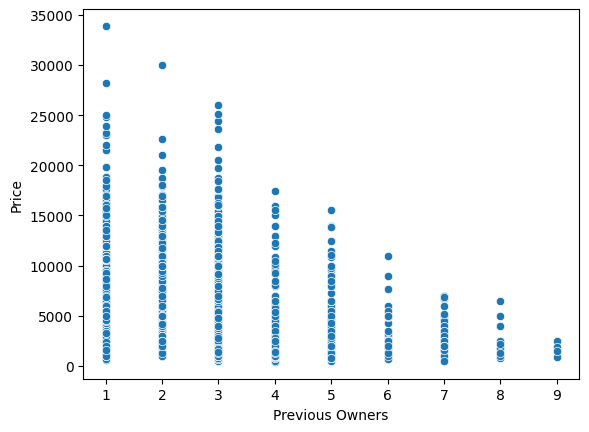

In [406]:
sns.scatterplot(x=df_merge['Previous Owners'],
                y=df_merge['Price']
                )
plt.show()

- Registration Year와 Price 사이의 scatter plot

<Axes: xlabel='Registration_Year', ylabel='Price'>

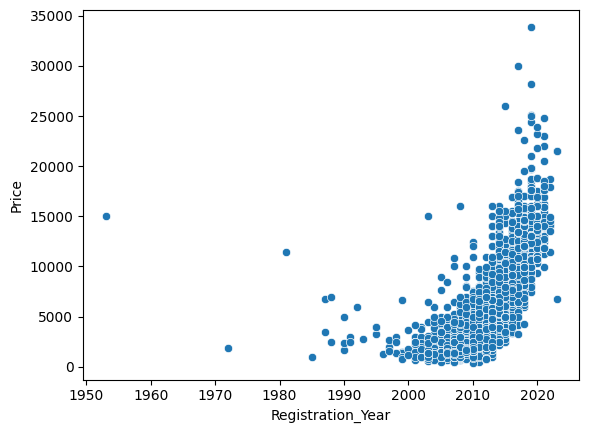

In [407]:
sns.scatterplot(x=df_merge['Registration_Year'],
                y=df_merge['Price'],)

<Axes: xlabel='Registration_Year', ylabel='Price'>

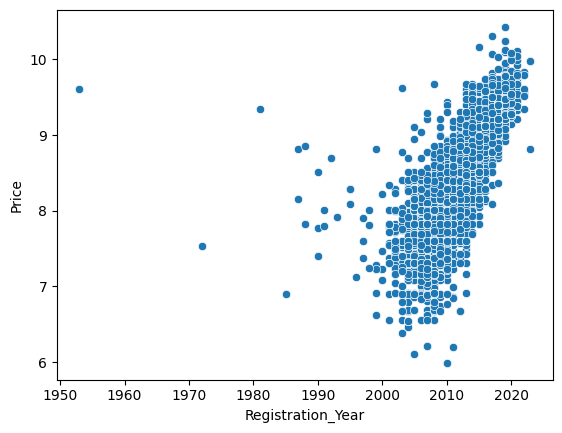

In [408]:
sns.scatterplot(x=df_merge['Registration_Year'],
                y=np.log(df_merge['Price']),
                )

### Scaler 활용하기

- 특정 컬럼들이 몇 종류의 데이터로 이루어져 있는지 계산

In [409]:
df_merge[['title','Fuel type','Body type','Gearbox','Emission Class','Service history','brand','country']].nunique()

title              448
Fuel type            6
Body type           10
Gearbox              2
Emission Class       6
Service history      2
brand               48
country             12
dtype: int64

In [410]:
df_merge = df_merge.drop('title', axis=1)

- 자동차의 브랜드별로 데이터 수 계산

In [411]:
df_merge['brand'].value_counts()

brand
VAUXHALL         549
FORD             409
VOLKSWAGEN       271
BMW              268
PEUGEOT          245
TOYOTA           193
NISSAN           178
RENAULT          175
MERCEDES-BENZ    168
AUDI             146
HONDA            108
FIAT             103
MINI              97
CITROEN           95
HYUNDAI           93
KIA               82
SKODA             63
SEAT              59
MAZDA             53
SUZUKI            41
VOLVO             39
LAND              35
MITSUBISHI        32
JAGUAR            30
ALFA              18
DACIA             14
CHEVROLET         14
SUBARU            11
JEEP               9
LEXUS              9
MG                 7
SAAB               7
INFINITI           7
DS                 6
ROVER              5
CHRYSLER           5
SMART              4
PROTON             3
ABARTH             3
PORSCHE            3
MASERATI           3
DAIHATSU           2
SSANGYONG          2
DODGE              1
DAEWOO             1
MARCOS             1
LAGONDA            1
ISUZU  

- 자동차의 브랜드별로 평균 가격 계산

In [412]:
df_merge.groupby(by='brand', as_index=False)['Price'].mean()

,brand,Price
0,ABARTH,11216.333333
1,ALFA,3197.388889
2,AUDI,7719.527397
3,BMW,8325.981343
4,CHEVROLET,3331.642857
5,CHRYSLER,2433.800000
6,CITROEN,4652.873684
7,DACIA,7439.571429
8,DAEWOO,995.000000
9,DAIHATSU,1695.000000


- 자동차의 브랜드별로 데이터 수와 평균 가격을 출력

In [413]:
## join 메소드를 사용하라는데... 문제 이해 못함...

df_merge.groupby(by='brand', as_index=False)['Price'].agg(['count', 'mean'])

,brand,count,mean
0,ABARTH,3,11216.333333
1,ALFA,18,3197.388889
2,AUDI,146,7719.527397
3,BMW,268,8325.981343
4,CHEVROLET,14,3331.642857
5,CHRYSLER,5,2433.800000
6,CITROEN,95,4652.873684
7,DACIA,14,7439.571429
8,DAEWOO,1,995.000000
9,DAIHATSU,2,1695.000000


- 범주형 컬럼들에 One-Hot Encoding 적용

In [414]:
df_merge2 = pd.get_dummies(df_merge, drop_first=True, dtype=int)
df_bonus2 = df_merge2.copy()

- Robust Scaler를 rs 변수로 정의

In [337]:
from sklearn.preprocessing import RobustScaler

In [338]:
rs = RobustScaler()

- robust scaling을 적용한 데이터프레임을 다시 저장

In [339]:
df_merge2_rs = rs.fit_transform(df_merge2)

- 주성분이 5개인 PCA 모델을 정의

In [324]:
from sklearn.decomposition import PCA

In [325]:
pca = PCA(n_components=5)

- df_merge2 데이터에 PCA 적용

In [326]:
pca.fit_transform(df_merge2_rs)

array([[-0.51498042, -0.422637  ,  0.41500261,  0.64667595,  0.28728176],
       [ 1.31238365, -1.21716972, -0.34955436, -0.2683556 , -0.15976308],
       [ 0.81207976, -0.22388179, -1.00603021,  0.65440695,  0.66323238],
       ...,
       [ 0.75728139,  1.45564165,  0.08526004,  0.2309435 ,  0.86444619],
       [ 1.65873026,  1.68212774, -1.00138436,  0.81134425,  0.40960241],
       [ 2.9199769 , -2.38625535,  1.90195228,  0.80652735,  0.06097284]],
      shape=(3669, 5))

- 원본 데이터 대비 PCA 데이터의 분산(explained variance) 비율을 계산

In [327]:
pca.explained_variance_ratio_

array([0.28119681, 0.1300397 , 0.10793743, 0.06884774, 0.05220485])

- 주성분 갯수가 2 ~ 10개일 때, explained variance ratio 각각 계산

In [328]:
for i in range(2, 11) :
    pca = PCA(n_components=i)
    pca.fit(df_merge2_rs)
    print(i, round(pca.explained_variance_ratio_.sum(), 2))

2 0.41
3 0.52
4 0.59
5 0.64
6 0.68
7 0.71
8 0.74
9 0.77
10 0.79


- 주성분 갯수가 7개일  때, PC1 ~ PC7 컬럼 출력

In [341]:
df_merge2_rs = pd.DataFrame(df_merge2_rs,
                            index=df_merge2.index,
                            columns=df_merge2.columns
                            )

df_merge2_rs.head()

,Price,Mileage(miles),Registration_Year,Previous Owners,Engine,Doors,Seats,Emission Class,Fuel type_Diesel Hybrid,Fuel type_Electric,...,country_Germany,country_Italy,country_Japan,country_Malaysia,country_Romania,country_South Korea,country_Spain,country_Sweden,country_United Kingdom,country_United States
0,0.526794,-0.213208,0.571429,0.0,-0.333333,0.0,0.0,0.5,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.455041,0.186566,-0.571429,1.0,-0.666667,-1.0,0.0,-0.5,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,-0.554223,1.238700,-0.142857,0.0,-0.333333,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,-0.291553,0.363591,-0.285714,2.0,-0.333333,-1.0,-1.0,-0.5,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,-0.544959,0.108658,0.142857,0.0,-0.500000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [346]:
pca = PCA(n_components=7)
pca_array = pca.fit_transform(df_merge2_rs)
pca_df = pd.DataFrame(pca_array,
                      columns=[f"PCA{num+1}" for num in range(pca_array.shape[1])]
                      )

pca_df

,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7
0,-0.514980,-0.422637,0.415003,0.646676,0.287282,0.032610,0.017744
1,1.312384,-1.217170,-0.349554,-0.268356,-0.159763,0.998415,-0.070193
2,0.812080,-0.223882,-1.006030,0.654407,0.663232,0.051149,-0.084697
3,1.961983,-1.312642,0.517619,-0.709751,0.546531,0.644088,-0.133217
4,0.267575,-0.653314,-0.514638,0.555964,-0.125742,1.161923,-0.179273
...,...,...,...,...,...,...,...
3664,1.427772,-0.807223,-0.187850,0.093612,-0.565527,-0.429525,0.001001
3665,0.435272,1.081559,0.283845,-0.141185,0.549215,-0.033513,0.091047
3666,0.757281,1.455642,0.085260,0.230943,0.864446,0.084921,-0.061957
3667,1.658730,1.682128,-1.001384,0.811344,0.409602,-0.056047,-0.769035


In [348]:
temp = {'설명 가능한 분산 비율': pca.explained_variance_,
        '기여율': pca.explained_variance_ratio_,
        }

results_pca = pd.DataFrame(temp, index=pca_df.columns )
results_pca['누적 기여율'] = results_pca['기여율'].cumsum()
results_pca

,설명 가능한 분산 비율,기여율,누적 기여율
PCA1,2.171369,0.281197,0.281197
PCA2,1.004152,0.130040,0.411237
PCA3,0.833480,0.107937,0.519174
PCA4,0.531634,0.068848,0.588022
PCA5,0.403120,0.052205,0.640227
PCA6,0.306783,0.039729,0.679956
PCA7,0.233565,0.030247,0.710203


- 국가별로 브랜드 개수 계산

In [350]:
df_bonus.groupby(by=['country'])['brand'].count()

country
Czech Republic     63
France            522
Germany           863
Italy             128
Japan             641
Malaysia            3
Romania            14
South Korea       178
Spain              60
Sweden             47
United Kingdom    729
United States     439
Name: brand, dtype: int64

- df_bonus의 각 컬럼들에 대해 상관계수 출력

In [416]:
df_bonus2.corr()

,Price,Mileage(miles),Registration_Year,Previous Owners,Engine,Doors,Seats,Emission Class,Fuel type_Diesel Hybrid,Fuel type_Electric,...,country_Germany,country_Italy,country_Japan,country_Malaysia,country_Romania,country_South Korea,country_Spain,country_Sweden,country_United Kingdom,country_United States
Price,1.000000,-0.497678,0.726692,-0.405319,-0.022016,0.112734,-0.028142,0.697556,0.064536,0.003454,...,0.214761,-0.059618,-0.053131,-0.022744,0.023080,0.025333,-0.035884,-0.053960,-0.044005,-0.085419
Mileage(miles),-0.497678,1.000000,-0.415663,0.264609,0.331313,-0.037886,0.095786,-0.377365,-0.018740,-0.054650,...,0.129420,-0.040980,0.014151,-0.020931,-0.065223,-0.054307,0.015241,0.145800,-0.107561,0.052088
Registration_Year,0.726692,-0.415663,1.000000,-0.395080,-0.291125,0.214872,0.031153,0.854981,0.026587,0.047026,...,-0.022031,-0.013313,-0.075366,-0.042340,0.061289,0.063323,0.001552,-0.074647,0.023407,-0.014176
Previous Owners,-0.405319,0.264609,-0.395080,1.000000,0.148082,-0.121885,-0.028751,-0.376419,-0.025477,0.008954,...,-0.012805,0.015921,-0.006432,-0.012863,-0.030246,-0.012425,-0.017805,0.041059,0.022877,-0.006334
Engine,-0.022016,0.331313,-0.291125,0.148082,1.000000,-0.060383,0.073264,-0.261697,0.013431,-0.001132,...,0.300542,-0.093117,-0.031786,-0.018066,-0.049124,-0.071379,-0.049428,0.091152,-0.022618,-0.064035
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
country_South Korea,0.025333,-0.054307,0.063323,-0.012425,-0.071379,0.084269,0.021286,0.039097,-0.003728,-0.020844,...,-0.124942,-0.042758,-0.103303,-0.006460,-0.013975,1.000000,-0.028867,-0.025444,-0.112056,-0.083139
country_Spain,-0.035884,0.015241,0.001552,-0.017805,-0.049428,-0.050657,0.022032,-0.009076,-0.002111,-0.011801,...,-0.070737,-0.024208,-0.058486,-0.003657,-0.007912,-0.028867,1.000000,-0.014405,-0.063441,-0.047070
country_Sweden,-0.053960,0.145800,-0.074647,0.041059,0.091152,0.000355,0.006654,-0.094956,-0.001861,-0.010401,...,-0.062347,-0.021336,-0.051549,-0.003223,-0.006974,-0.025444,-0.014405,1.000000,-0.055917,-0.041487
country_United Kingdom,-0.044005,-0.107561,0.023407,0.022877,-0.022618,-0.062576,-0.014355,0.039673,-0.008194,-0.038331,...,-0.274583,-0.093968,-0.227028,-0.014196,-0.030713,-0.112056,-0.063441,-0.055917,1.000000,-0.182713
